In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import gensim
from gensim import corpora

import string
from string import punctuation
from pathlib import Path
from pprint import pprint

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import nltk.tokenize as tk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import pandas as pd
import numpy as np

from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

from nltk.util import ngrams

[nltk_data] Downloading package stopwords to C:\Users\Zude
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zude
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zude
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zude Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:

data_folder = Path(r'C:\Users\Zude Ang\VSC\IND_TopicModellingOV\src')


#read each file from the directory into an array and name it corpus
corpus = []
filenames = []

for filename in data_folder.iterdir():
   fp = open(str(filename), 'r', encoding='latin1')
   corpus.append(fp.read())
   #keep the filename for later use
   filenames.append(filename.name)
   fp.close()

df = pd.DataFrame()
df['Filenames'] = filenames
df['Content'] = corpus



In [3]:
df

,Filenames,Content
0,Is sustainability just another passing trend .txt,\n[Speaker 1] WTF you're on the series what th...


In [34]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

NameError: name 'sklearn' is not defined

In [4]:
df['tokenized'] = ''
for i in df.index:
    tokenize = tk.word_tokenize(df['Content'][i])
    df['tokenized'][i] = tokenize

c:\Users\Zude Ang\VSC\IND_TopicModellingOV\.venv\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


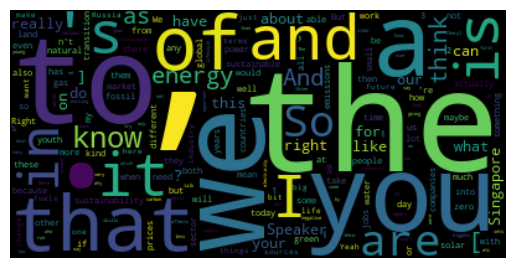

In [5]:
word_list = []
for i in df.index:
    for j in df["tokenized"][i]:
        word_list.append(j)
word_list

freq_dist = nltk.FreqDist(word_list)
# sorted_freqdist = sorted(freq_dist, key = freq_dist.__getitem__, reverse=True)

wcloud = WordCloud().generate_from_frequencies(freq_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

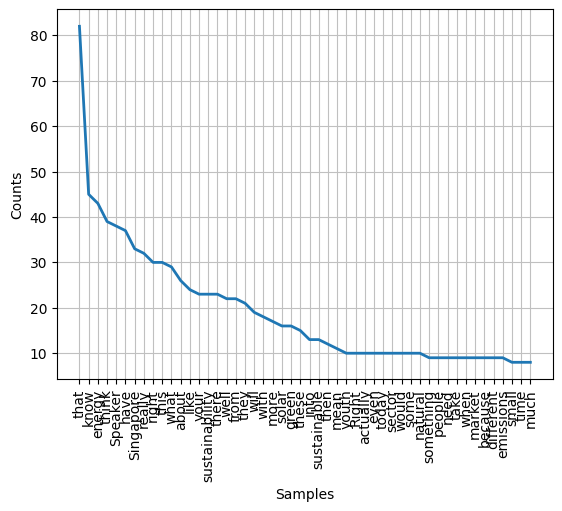

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
words = dict([(k,v) for k,v in freq_dist.items() if len(k)>3])

freq_dist = nltk.FreqDist(words)
freq_dist.plot(50,cumulative=False)

In [7]:
stop_words = stopwords.words('english')
new_stop = ['know','think','like','also','really','well','would','right','us','one','actually','people','city','year','question']
stop_words.extend(new_stop)

def cleaned_corpus(corpus):
    tokens = word_tokenize(corpus)

    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    tokens = [token for token in tokens if not token.isnumeric()]
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [stemmer.stem(token) for token in tokens]
    
    cleaned_corpus = ' '.join(tokens)
    return cleaned_corpus

df['cleaned_corpus'] = df['Content'].apply(cleaned_corpus)

print(df['cleaned_corpus'])

0    speaker wtf seri futur futur aim dive deep hot...
Name: cleaned_corpus, dtype: object


In [8]:
def tagPOS(text):
    tokenized = sent_tokenize(text) 
    tagged_text = []

    for i in tokenized: 
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList) 
        tagged_text.extend(tagged)

    return tagged_text

In [9]:
df['POS_News'] = df['cleaned_corpus'].apply(lambda x: tagPOS(x))  
df.head()

,Filenames,Content,tokenized,cleaned_corpus,POS_News
0,Is sustainability just another passing trend .txt,\n[Speaker 1] WTF you're on the series what th...,"[[, Speaker, 1, ], WTF, you, 're, on, the, ser...",speaker wtf seri futur futur aim dive deep hot...,"[(speaker, NN), (wtf, NN), (seri, NN), (futur,..."


In [10]:
# Enter codes here
# find the top N words based on the POS tag
def findtags(tag_prefix, tagged_text, n):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(n)) for tag in cfd.conditions())

# find the top 5 adjective in the first news
tagged_text = df['POS_News'][0]
tagdict = findtags('NN', tagged_text, 5)
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('speaker', 36), ('singapor', 23), ('sustain', 23), ('energi', 18), ('today', 12)]
NNS [('singapor', 2), ('data', 2), ('countri', 2), ('everyon', 1), ('policemen', 1)]


In [11]:
# Enter code here
from pprint import pprint

doc = nlp(df['Content'][0])
pprint([(X.text, X.label_) for X in doc.ents])


[('1', 'CARDINAL'),
 ('WTF', 'ORG'),
 ("the National Youth Council's", 'ORG'),
 ('Asia', 'LOC'),
 ('the Singapore Institute of International Affairs', 'ORG'),
 ('Today', 'DATE'),
 ('two', 'CARDINAL'),
 ('Sustainability', 'ORG'),
 ('recent years', 'DATE'),
 ('zero', 'CARDINAL'),
 ('100', 'CARDINAL'),
 ('Singaporeans', 'NORP'),
 ('two', 'CARDINAL'),
 ('today', 'DATE'),
 ('first', 'ORDINAL'),
 ('Policy and Planning', 'ORG'),
 ('EMA', 'ORG'),
 ('EME', 'ORG'),
 ('2', 'CARDINAL'),
 ('EMA', 'ORG'),
 ('Marta', 'GPE'),
 ('Singapore', 'GPE'),
 ('Singapore', 'GPE'),
 ('1', 'CARDINAL'),
 ('2', 'CARDINAL'),
 ('1', 'CARDINAL'),
 ('second', 'ORDINAL'),
 ('today', 'DATE'),
 ('Cheryl Chen', 'PERSON'),
 ('SMP', 'ORG'),
 ('3', 'CARDINAL'),
 ('annual', 'DATE'),
 ('more than 10 years', 'DATE'),
 ('ESG', 'ORG'),
 ('1', 'CARDINAL'),
 ('zero', 'CARDINAL'),
 ('Singapore', 'GPE'),
 ('3', 'CARDINAL'),
 ('iPads', 'FAC'),
 ('first', 'ORDINAL'),
 ('Nexus', 'ORG'),
 ('1', 'CARDINAL'),
 ('Singapore', 'GPE'),
 ('2', '

In [12]:
# Enter code here
labels = [x.label_ for x in doc.ents]
Counter(labels)


Counter({'CARDINAL': 61,
         'GPE': 49,
         'DATE': 31,
         'ORG': 15,
         'ORDINAL': 8,
         'PERCENT': 8,
         'PERSON': 5,
         'LOC': 4,
         'QUANTITY': 2,
         'NORP': 1,
         'FAC': 1,
         'TIME': 1})

In [13]:
# Enter code here
items = [x.text for x in doc.ents]
Counter(items).most_common(3)


[('Singapore', 32), ('1', 17), ('today', 10)]

In [14]:
df['cleaned_tokenized'] = ''
for i in df.index:
    tokenize = tk.word_tokenize(df['cleaned_corpus'][i])
    df['cleaned_tokenized'][i] = tokenize

In [15]:
df['lemmed'] =''
for i in df.index:
    lemmatized = []
    for j in df['cleaned_tokenized'][i]:
        lemmatized.append(lemmatizer.lemmatize(j, pos = 'n'))
        df['lemmed'][i] = lemmatized 

In [16]:
distinct = []
for row in df['lemmed']:
    unique_words = set(row)
    distinct.append(len(unique_words))

df['Count'] = distinct

In [17]:
df

,Filenames,Content,tokenized,cleaned_corpus,POS_News,cleaned_tokenized,lemmed,Count
0,Is sustainability just another passing trend .txt,\n[Speaker 1] WTF you're on the series what th...,"[[, Speaker, 1, ], WTF, you, 're, on, the, ser...",speaker wtf seri futur futur aim dive deep hot...,"[(speaker, NN), (wtf, NN), (seri, NN), (futur,...","[speaker, wtf, seri, futur, futur, aim, dive, ...","[speaker, wtf, seri, futur, futur, aim, dive, ...",636


c:\Users\Zude Ang\VSC\IND_TopicModellingOV\.venv\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


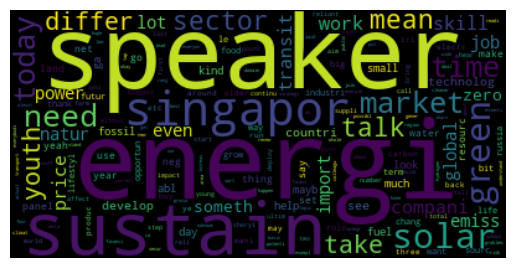

In [18]:
word_list = []
for i in df.index:
    for j in df["lemmed"][i]:
        word_list.append(j)
word_list

freq_dist = nltk.FreqDist(word_list)
# sorted_freqdist = sorted(freq_dist, key = freq_dist.__getitem__, reverse=True)

wcloud = WordCloud().generate_from_frequencies(freq_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

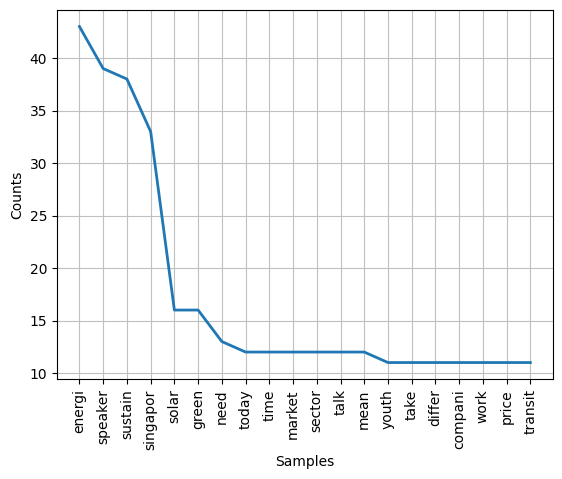

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
words = dict([(k,v) for k,v in freq_dist.items() if len(k)>3])

freq_dist = nltk.FreqDist(words)
freq_dist.plot(20,cumulative=False)

In [20]:
cleaned = df['cleaned_corpus']


In [21]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return(final)

data_words = gen_words(cleaned)
print(data_words[0][0:20])

['speaker', 'wtf', 'seri', 'futur', 'futur', 'aim', 'dive', 'deep', 'hot', 'topic', 'youth', 'may', 'scratch', 'head', 'basic', 'ask', 'tough', 'question', 'hi', 'everyon']


In [22]:
bigrams_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return(bigram[texts])

def make_trigrams(texts):
    return(trigram[bigram[texts]])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print(data_bigrams_trigrams[0][0:20])

['speaker', 'wtf', 'seri', 'futur', 'futur', 'aim', 'dive', 'deep', 'hot', 'topic', 'youth', 'may', 'scratch', 'head', 'basic', 'ask', 'tough', 'question', 'hi', 'everyon']


In [23]:
#tf-idf
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)
texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0][0:20])

# tfidf = TfidfModel(corpus, id2word=id2word)
# low_value = 0.05

# words= []
# words_missing = []

# for i in range(0, len(corpus)):
#     bow = corpus[i]
#     low_value_words = []
#     tfidf_ids = [id for id, value in tfidf[bow]]
#     bow_ids = [id for id, value in bow]
#     low_value_words = [id for id, value in tfidf[bow] if value < low_value]
#     drops = low_value_words+words_missing
#     for item in drops:
#         words.append(id2word[item])
#     words_missing = [id for id in bow_ids if id not in tfidf_ids]

#     new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing]
#     corpus[i] = new_bow
#     print(corpus)

[(0, 8), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 4), (17, 2), (18, 3), (19, 1)]


In [33]:
topic_num = 5
word_num = 1

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus, num_topics = topic_num, id2word = id2word, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))



[(0, '0.023*"energi"'),
 (1, '0.002*"energi"'),
 (2, '0.002*"speaker"'),
 (3, '0.002*"energi"'),
 (4, '0.002*"energi"')]


In [25]:
topic_counter = 15

stats_df = pd.DataFrame()

for item in np.arange(1, topic_counter,2):
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics = topic_num, id2word = id2word, passes=20) 

    per_var = ldamodel.log_perplexity(corpus)
    temp_df = pd.DataFrame([[item,per_var]],columns = ['Topic_num','Perplexity'])
    stats_df = pd.concat([stats_df, temp_df])

stats_df


,Topic_num,Perplexity
0,1,-6.696356
0,3,-6.696356
0,5,-6.696375
0,7,-6.696357
0,9,-6.696356
0,11,-6.696367
0,13,-6.696362


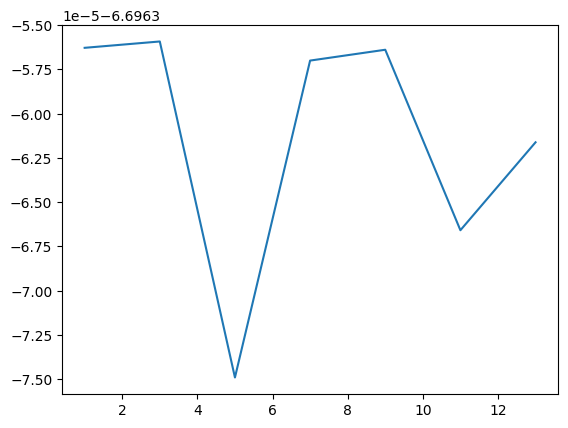

In [26]:
plt.plot(stats_df.Topic_num, stats_df.Perplexity)
plt.show()

In [27]:
dict = df['lemmed'].tolist()
filenames = df['Filenames'].tolist()
dictionary = corpora.Dictionary(dict)
print(dict)
    

[['speaker', 'wtf', 'seri', 'futur', 'futur', 'aim', 'dive', 'deep', 'hot', 'topic', 'youth', 'may', 'scratch', 'head', 'basic', 'ask', 'tough', 'question', 'hi', 'everyon', 'remain', 'everi', 'welcom', 'back', 'anoth', 'episod', 'wtf', 'futur', 'futur', 'podcast', 'seri', 'brought', 'nation', 'youth', 'council', 'asia', 'readi', 'exposur', 'program', 'brought', 'partnership', 'singapor', 'institut', 'intern', 'affair', 'today', 'topic', 'someth', 'two', 'spoken', 'ye', 'sustain', 'sustain', 'buzzword', 'recent', 'year', 'lot', 'say', 'need', 'sustain', 'climat', 'chang', 'save', 'world', 'global', 'warm', 'world', 'go', 'end', 'person', 'view', 'sustain', 'sustain', 'someth', 'lot', 'perceiv', 'oh', 'chang', 'whole', 'life', 'go', 'zero', 'case', 'opinion', 'everyon', 'take', 'small', 'step', 'sustain', 'make', 'impact', 'yeah', 'everi', 'small', 'thing', 'play', 'big', 'part', 'person', 'beach', 'cleanup', 'take', 'time', 'sometim', 'find', 'time', 'disciplin', 'feel', 'small', 'litt

In [28]:
# Enter code here
print('\nFile name and its corresponding topic id with probability:')
dic_topic_doc = {}
for index, doc in enumerate(dict):
    #for doc in corpus:
    bow =  id2word.doc2bow(doc)
    
    #get topic distribution of the ldamodel
    t = ldamodel.get_document_topics(bow)

    #sort the probability value in descending order to extract the top contributing topic id
    #sorted_t = sorted(t, key=lambda x: x[1], reverse=True)

    #print only the filename 
    print(filenames[index],t)

    #get the top scoring item
    top_item = t.pop(0)

    #create dictionary and keep key as topic id and filename and probability in tuple as value
    dic_topic_doc.setdefault(top_item[0],[]).append((filenames[index],top_item[1]))


File name and its corresponding topic id with probability:
Is sustainability just another passing trend .txt [(3, 0.9994739)]


In [29]:
print(ldamodel)
print(corpus)
print(id2word)

LdaModel<num_terms=634, num_topics=10, decay=0.5, chunksize=2000>
[[(0, 8), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 4), (17, 2), (18, 3), (19, 1), (20, 2), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 5), (34, 2), (35, 2), (36, 1), (37, 1), (38, 2), (39, 2), (40, 1), (41, 1), (42, 5), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 1), (55, 6), (56, 1), (57, 4), (58, 1), (59, 6), (60, 1), (61, 4), (62, 2), (63, 2), (64, 3), (65, 1), (66, 1), (67, 5), (68, 1), (69, 3), (70, 1), (71, 4), (72, 1), (73, 1), (74, 2), (75, 5), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 6), (85, 1), (86, 3), (87, 1), (88, 4), (89, 1), (90, 2), (91, 1), (92, 1), (93, 3), (94, 1), (95, 1), (96, 3), (97, 2), (98, 3), (99, 1), (100, 1), (101, 1), (102, 1), (103, 11), (

In [30]:

%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
3     -0.084182  0.0       1        1  99.947911
0      0.009268  0.0       2        1   0.005788
1      0.009421  0.0       3        1   0.005788
2      0.009428 -0.0       4        1   0.005788
4      0.009530 -0.0       5        1   0.005788
5      0.008875 -0.0       6        1   0.005788
6      0.009412 -0.0       7        1   0.005788
7      0.009419  0.0       8        1   0.005788
8      0.009285 -0.0       9        1   0.005788
9      0.009543  0.0      10        1   0.005788, topic_info=         Term       Freq      Total Category  logprob  loglift
168    energi  41.000000  41.000000  Default  30.0000  30.0000
526   speaker  37.000000  37.000000  Default  29.0000  29.0000
550   sustain  36.000000  36.000000  Default  28.0000  28.0000
507  singapor  31.000000  31.000000  Default  27.0000  27.0000
517     solar  15.000000  15.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
519    someth   0.000158   8.774823  Topic10  -6.4503  -1.1681
629      year   0.000158   6.846898  Topic10  -6.4505  -0.9201
117   countri   0.000158   8.775281  Topic10  -6.4505  -1.1683
633      zero   0.000158   8.774488  Topic10  -6.4505  -1.1682
143    differ   0.000158  10.703770  Topic10  -6.4505  -1.3670

[702 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.941898  absolut
4         1  0.941873      act
5         1  0.941985   action
6         1  0.941903    activ
10        1  0.941865    adult
...     ...       ...      ...
619       1  0.941835   winter
623       1  1.027690     work
629       1  1.022361     year
632       1  1.027711    youth
633       1  1.025701     zero

[267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5, 6, 7, 8, 9, 10])

In [31]:
df['cleaned_tokenized'][0]

['speaker',
 'wtf',
 'seri',
 'futur',
 'futur',
 'aim',
 'dive',
 'deep',
 'hot',
 'topic',
 'youth',
 'may',
 'scratch',
 'head',
 'basic',
 'ask',
 'tough',
 'question',
 'hi',
 'everyon',
 'remain',
 'everi',
 'welcom',
 'back',
 'anoth',
 'episod',
 'wtf',
 'futur',
 'futur',
 'podcast',
 'seri',
 'brought',
 'nation',
 'youth',
 'council',
 'asia',
 'readi',
 'exposur',
 'program',
 'brought',
 'partnership',
 'singapor',
 'institut',
 'intern',
 'affair',
 'today',
 'topic',
 'someth',
 'two',
 'spoken',
 'ye',
 'sustain',
 'sustain',
 'buzzword',
 'recent',
 'year',
 'lot',
 'say',
 'need',
 'sustain',
 'climat',
 'chang',
 'save',
 'world',
 'global',
 'warm',
 'world',
 'go',
 'end',
 'person',
 'view',
 'sustain',
 'sustain',
 'someth',
 'lot',
 'perceiv',
 'oh',
 'chang',
 'whole',
 'life',
 'go',
 'zero',
 'case',
 'opinion',
 'everyon',
 'take',
 'small',
 'step',
 'sustain',
 'make',
 'impact',
 'yeah',
 'everi',
 'small',
 'thing',
 'play',
 'big',
 'part',
 'person',
 